In [17]:
import pandas as pd
import numpy as np

# Basic dataset properties
num_rows, num_cols = df.shape
num_numeric = df.select_dtypes(include=[np.number]).shape[1]
num_categorical = df.select_dtypes(exclude=[np.number]).shape[1]

overview_df = pd.DataFrame(
    {
        "Property": [
            "Total rows",
            "Total columns",
            "Numeric columns",
            "Categorical columns",
        ],
        "Value": [
            num_rows,
            num_cols,
            num_numeric,
            num_categorical,
        ],
    }
)

print("DATASET OVERVIEW:")
display(overview_df)

# Missing values per column
missing_df = (
    df.isna()
      .sum()
      .reset_index()
      .rename(columns={"index": "Column", 0: "MissingCount"})
)
missing_df["MissingPercent"] = (missing_df["MissingCount"] / len(df) * 100).round(2)
missing_df = missing_df.sort_values("MissingCount", ascending=False)

print("\nMISSING VALUES PER COLUMN:")
display(missing_df)

# Price stats
price_stats = (
    df["price"]
    .describe()[["count","mean","std","min","25%","50%","75%","max"]]
    .rename({
        "25%": "25%",
        "50%": "50% (median)",
        "75%": "75%",
    })
)

price_stats_df = price_stats.reset_index()
price_stats_df.columns = ["Statistic", "price"]

print("\nTARGET PRICE STATS (ORIGINAL SCALE):")
display(price_stats_df)


DATASET OVERVIEW:


,Property,Value
0,Total rows,4600
1,Total columns,18
2,Numeric columns,13
3,Categorical columns,5



MISSING VALUES PER COLUMN:


,Column,MissingCount,MissingPercent
0,date,0,0.00
1,price,0,0.00
16,statezip,0,0.00
15,city,0,0.00
14,street,0,0.00
13,yr_renovated,0,0.00
12,yr_built,0,0.00
11,sqft_basement,0,0.00
10,sqft_above,0,0.00
9,condition,0,0.00



TARGET PRICE STATS (ORIGINAL SCALE):


,Statistic,price
0,count,"4,600.00"
1,mean,"551,962.99"
2,std,"563,834.70"
3,min,0.00
4,25%,"322,875.00"
5,50% (median),"460,943.46"
6,75%,"654,962.50"
7,max,"26,590,000.00"


In [18]:
# Columns + dtypes after cleaning
cols_after = pd.DataFrame({
    "Column": df_clean.columns,
    "Dtype": df_clean.dtypes.astype(str)
})

print("COLUMNS AFTER CLEANING:")
display(cols_after)

# Missing values after cleaning
missing_after = (
    df_clean.isna()
    .sum()
    .reset_index()
    .rename(columns={"index": "Column", 0: "MissingCount"})
)
missing_after["MissingPercent"] = (missing_after["MissingCount"] / len(df_clean) * 100).round(2)
missing_after = missing_after.sort_values("MissingCount", ascending=False)

print("\nMISSING VALUES AFTER CLEANING:")
display(missing_after)

# Summary of what we changed in Step 2
changes_info = [
    ["date -> sold_year / sold_month",
     "Extracted sale timing so model can learn market trends."],
    ["statezip -> state / zip",
     "Split location into separate features."],
    ["yr_renovated: 0 -> NaN",
     "0 means 'never renovated', treat as missing not real year."],
    ["Dropped street / country / statezip / date",
     "Too unique or redundant; would cause noise or leakage."],
    ["drop_duplicates()",
     "Removed duplicate rows to avoid data leakage."],
]

changes_df = pd.DataFrame(changes_info, columns=["Transformation", "Reason"])

print("\nMAIN PREPROCESSING STEPS APPLIED:")
display(changes_df)


COLUMNS AFTER CLEANING:


,Column,Dtype
price,price,float64
bedrooms,bedrooms,float64
bathrooms,bathrooms,float64
sqft_living,sqft_living,int64
sqft_lot,sqft_lot,int64
floors,floors,float64
waterfront,waterfront,int64
view,view,int64
condition,condition,int64
sqft_above,sqft_above,int64



MISSING VALUES AFTER CLEANING:


,Column,MissingCount,MissingPercent
12,yr_renovated,2735,59.46
0,price,0,0.00
1,bedrooms,0,0.00
16,state,0,0.00
15,sold_month,0,0.00
14,sold_year,0,0.00
13,city,0,0.00
11,yr_built,0,0.00
10,sqft_basement,0,0.00
9,sqft_above,0,0.00



MAIN PREPROCESSING STEPS APPLIED:


,Transformation,Reason
0,date -> sold_year / sold_month,Extracted sale timing so model can learn marke...
1,statezip -> state / zip,Split location into separate features.
2,yr_renovated: 0 -> NaN,"0 means 'never renovated', treat as missing no..."
3,Dropped street / country / statezip / date,Too unique or redundant; would cause noise or ...
4,drop_duplicates(),Removed duplicate rows to avoid data leakage.


X shape: (4600, 17)
y shape: (4600,)


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,sold_year,sold_month,state,zip
0,3.00,1.50,1340,7912,1.50,0,0,3,1340,0,1955,"2,005.00",Shoreline,2014,5,WA,98133
1,5.00,2.50,3650,9050,2.00,0,4,5,3370,280,1921,NaN,Seattle,2014,5,WA,98119
2,3.00,2.00,1930,11947,1.00,0,0,4,1930,0,1966,NaN,Kent,2014,5,WA,98042
3,3.00,2.25,2000,8030,1.00,0,0,4,1000,1000,1963,NaN,Bellevue,2014,5,WA,98008
4,4.00,2.50,1940,10500,1.00,0,0,4,1140,800,1976,"1,992.00",Redmond,2014,5,WA,98052


0     313,000.00
1   2,384,000.00
2     342,000.00
3     420,000.00
4     550,000.00
Name: price, dtype: float64


Original price describe():
count        4,600.00
mean       551,962.99
std        563,834.70
min              0.00
25%        322,875.00
50%        460,943.46
75%        654,962.50
max     26,590,000.00
Name: price, dtype: float64

Log(1+price) describe():
count   4,600.00
mean       12.93
std         1.45
min         0.00
25%        12.69
50%        13.04
75%        13.39
max        17.10
Name: price, dtype: float64


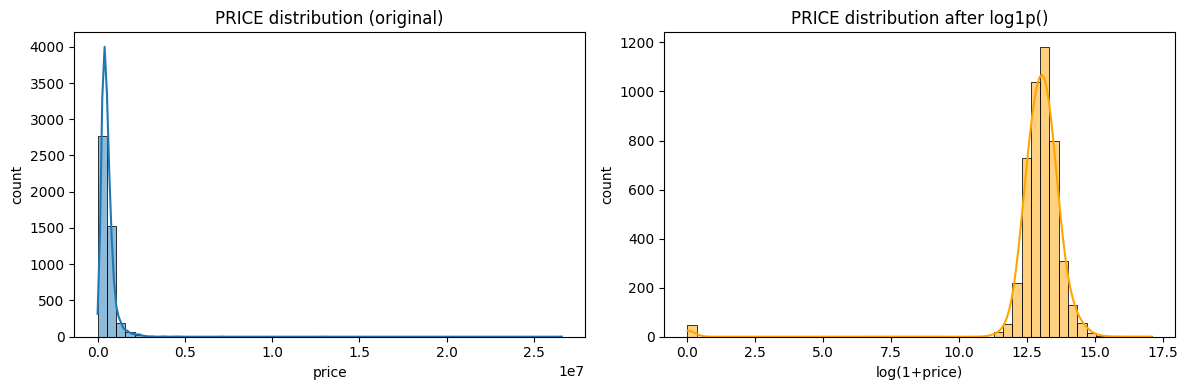

In [20]:
# STEP 3: Define target and handle skew in the target

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Target (what we want to predict)
y = df_clean["price"]

# 2. Features (everything except price)
X = df_clean.drop(columns=["price"])

print("X shape:", X.shape)
print("y shape:", y.shape)

# Show first few just to confirm alignment
display(X.head())
display(y.head())

# 3. Log-transform the target to reduce skew / extreme high prices
#    log1p(price) = log(1 + price)
#    We will train models to predict y_log instead of raw price.
y_log = np.log1p(y)

print("\nOriginal price describe():")
print(y.describe())

print("\nLog(1+price) describe():")
print(y_log.describe())

# 4. Plot both distributions to compare skew
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
sns.histplot(y, bins=50, kde=True)
plt.title("PRICE distribution (original)")
plt.xlabel("price")
plt.ylabel("count")

plt.subplot(1,2,2)
sns.histplot(y_log, bins=50, kde=True, color="orange")
plt.title("PRICE distribution after log1p()")
plt.xlabel("log(1+price)")
plt.ylabel("count")

plt.tight_layout()
plt.show()


In [21]:
# STEP 4: Train/Test split with approximate stratification by price range

from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# We already have:
# X        -> features (without price)
# y        -> raw price
# y_log    -> log1p(price)

# 1. Create bins of the ORIGINAL price so we can "stratify"
#    We'll split prices into 10 quantile buckets.
#    Why: we want both cheap and expensive houses spread across train and test.
price_bins = pd.qcut(y, q=10, duplicates="drop")

# 2. Do the split.
#    We'll split X, y, and y_log together so that they stay aligned.
X_train, X_test, y_train, y_test, ylog_train, ylog_test = train_test_split(
    X,
    y,
    y_log,
    test_size=0.2,
    random_state=42,
    stratify=price_bins    # keep similar price distribution in both sets
)

print("Train shape:", X_train.shape, " | Test shape:", X_test.shape)
print("Train price stats:")
print(y_train.describe())
print("\nTest price stats:")
print(y_test.describe())

# 3. Visual check: compare average price in train vs test
print("\nAverage train price: ", float(y_train.mean()))
print("Average test price : ", float(y_test.mean()))


Train shape: (3680, 17)  | Test shape: (920, 17)
Train price stats:
count        3,680.00
mean       553,988.72
std        604,773.76
min              0.00
25%        323,625.00
50%        460,443.46
75%        651,000.00
max     26,590,000.00
Name: price, dtype: float64

Test price stats:
count         920.00
mean      543,860.07
std       355,879.55
min             0.00
25%       320,750.00
50%       462,000.00
75%       658,000.00
max     4,489,000.00
Name: price, dtype: float64

Average train price:  553988.7191391789
Average test price :  543860.0658093554


In [22]:
# STEP 5: Build preprocessing pipeline (imputer + scaler + one-hot)

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
import numpy as np
import pandas as pd

# 1. Identify numeric and categorical columns from X_train
numeric_cols = X_train.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = X_train.select_dtypes(exclude=[np.number]).columns.tolist()

print("Numeric columns:", numeric_cols)
print("\nCategorical columns:", categorical_cols)

# 2. Build the transformers for each type

# numeric pipeline:
# - fill missing numeric values with median
# - scale them (mean 0, std 1) so models like MLPRegressor don't explode
numeric_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

# categorical pipeline:
# - fill missing categorical values with most_frequent
# - one-hot encode them into 0/1 columns
categorical_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(handle_unknown="ignore"))
])

# 3. Combine both into ONE ColumnTransformer.
# This will:
# - apply numeric_transformer to numeric_cols
# - apply categorical_transformer to categorical_cols
# After this, you get a clean numeric-only feature matrix that all ML models can use.
preprocess = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_cols),
        ("cat", categorical_transformer, categorical_cols),
    ]
)

print("\nPreprocessing pipeline ready: 'preprocess'")


Numeric columns: ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'sold_year', 'sold_month']

Categorical columns: ['city', 'state', 'zip']

Preprocessing pipeline ready: 'preprocess'


In [38]:
# STEP 6: Baseline Model Training & Evaluation
# We will train 2 regression models:
#   1. RandomForestRegressor (tree ensemble model)
#   2. MLPRegressor (neural-network style regressor)
#
# Both models will:
# - Use the same preprocessing pipeline from Step 5 (impute, scale, one-hot encode)
# - Be trained to predict log(price) instead of raw price, to handle skew
# - Be evaluated on the test set in REAL price units (original currency)
#
# Metrics we report:
# - MAE  (Mean Absolute Error): lower is better
# - RMSE (Root Mean Squared Error): lower is better
# - R2   (coefficient of determination): closer to 1 is better


from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd


# Helper function to evaluate a regression model in real money terms
def evaluate_regression(y_true_price, y_pred_price, label):
    """
    y_true_price : actual house prices (not log)
    y_pred_price : predicted house prices (not log)
    label        : model name (string) for reporting

    Returns a dict with:
    - MAE  : mean absolute error
    - RMSE : root mean squared error
    - R2   : R-squared score
    """
    mae = mean_absolute_error(y_true_price, y_pred_price)
    mse = mean_squared_error(y_true_price, y_pred_price)
    rmse = np.sqrt(mse)  # manual RMSE for compatibility with older sklearn
    r2 = r2_score(y_true_price, y_pred_price)

    return {
        "Model": label,
        "MAE": mae,
        "RMSE": rmse,
        "R2": r2
    }


# we'll collect all results here
results = []


# -------------------------------------------------
# MODEL 1: RANDOM FOREST REGRESSOR (BASELINE)
# -------------------------------------------------

# Create the RandomForestRegressor model with some reasonable defaults
rf_model = RandomForestRegressor(
    n_estimators=200,  # number of trees in the forest
    random_state=42,  # for reproducibility
    n_jobs=-1         # use all CPU cores to train faster
)

# Build a Pipeline that:
# 1. runs 'preprocess' from Step 5 (imputation, scaling, one-hot encoding)
# 2. applies the RandomForestRegressor model
rf_pipeline = Pipeline(steps=[
    ("preprocess", preprocess),   # <-- this is the ColumnTransformer from Step 5
    ("model", rf_model)
])

# Train Random Forest on the TRAIN split
# IMPORTANT: we train on ylog_train (log(price)) not raw price
rf_pipeline.fit(X_train, ylog_train)

# Predict log(price) for the TEST split
ylog_pred_rf = rf_pipeline.predict(X_test)

# Convert predictions back to real price units
# We used log1p(price) during training, so we reverse with expm1(...)
y_pred_rf = np.expm1(ylog_pred_rf)

# Evaluate Random Forest performance in real currency
results.append(
    evaluate_regression(y_test, y_pred_rf, "RandomForestRegressor")
)


# -------------------------------------------------
# MODEL 2: MLP REGRESSOR (BASELINE NEURAL NETWORK)
# -------------------------------------------------

# Create an MLPRegressor (a feedforward neural network / "deep learning"-style model)
mlp_model = MLPRegressor(
    hidden_layer_sizes=(128, 64, 32),  # 3 dense hidden layers
    activation="relu",                 # non-linear activation
    solver="adam",                     # adaptive optimizer
    max_iter=300,                      # training iterations
    random_state=42                    # reproducibility
)

# Build a Pipeline for MLP:
# - same preprocessing
# - then the MLP model
mlp_pipeline = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", mlp_model)
])

# Train the MLP on ylog_train (log(price))
mlp_pipeline.fit(X_train, ylog_train)

# Predict log(price) for the TEST split
ylog_pred_mlp = mlp_pipeline.predict(X_test)

# Convert predictions back to original price scale
y_pred_mlp = np.expm1(ylog_pred_mlp)

# Evaluate MLP performance in real currency
results.append(
    evaluate_regression(y_test, y_pred_mlp, "MLPRegressor")
)


# -------------------------------------------------
# RESULTS SUMMARY TABLE
# -------------------------------------------------

results_df = pd.DataFrame(results)

print("MODEL PERFORMANCE (evaluated on REAL price values):")
print(results_df)

print("\nHow to interpret these metrics:")
print("- MAE  = Mean Absolute Error. On average, how far (in currency units) the prediction is from the true price.")
print("- RMSE = Root Mean Squared Error. Punishes big mistakes more (e.g. very expensive houses). Lower is better.")
print("- R2   = R-squared. Measures how much of the price variation the model explains. Closer to 1 is better.")


MODEL PERFORMANCE (evaluated on REAL price values):
                   Model          MAE          RMSE         R2
0  RandomForestRegressor   139,115.14    292,723.56       0.32
1           MLPRegressor 1,618,607.39 38,588,322.28 -11,769.04

How to interpret these metrics:
- MAE  = Mean Absolute Error. On average, how far (in currency units) the prediction is from the true price.
- RMSE = Root Mean Squared Error. Punishes big mistakes more (e.g. very expensive houses). Lower is better.
- R2   = R-squared. Measures how much of the price variation the model explains. Closer to 1 is better.


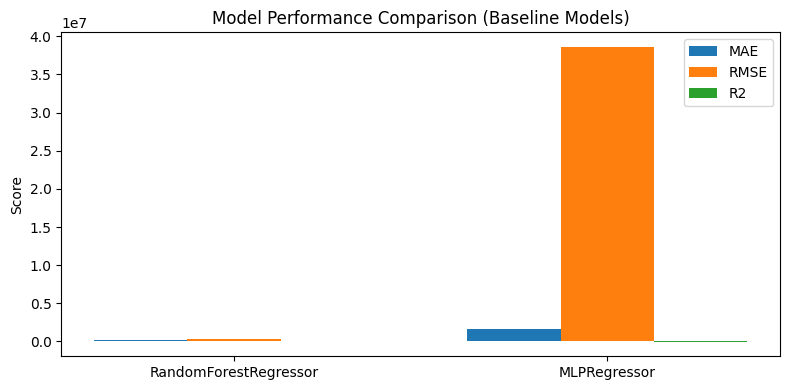

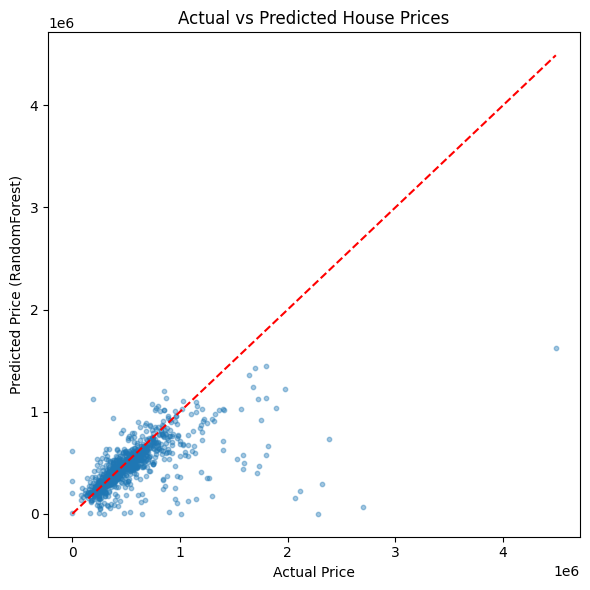

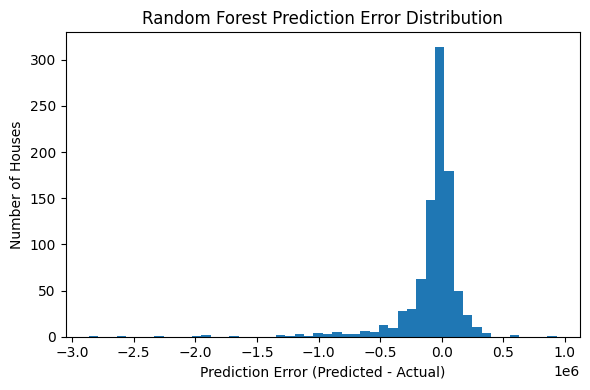

In [39]:
import matplotlib.pyplot as plt
import numpy as np

# -------------------------------------------------
# PLOT 1: Comparison bar charts for MAE, RMSE, R2
# -------------------------------------------------

# We'll plot MAE, RMSE, and R2 for both models.
metrics_to_plot = ["MAE", "RMSE", "R2"]

# Make sure results_df index is clean and in the order we want
# results_df["Model"] should have ["RandomForestRegressor", "MLPRegressor"]
plot_df = results_df.set_index("Model")[metrics_to_plot]

plt.figure(figsize=(8,4))
x = np.arange(len(plot_df.index))  # model positions on x axis
width = 0.25                       # width of each bar

# one bar group per metric
for i, metric in enumerate(metrics_to_plot):
    plt.bar(x + i*width,
            plot_df[metric],
            width=width,
            label=metric)

plt.xticks(x + width, plot_df.index, rotation=0)
plt.ylabel("Score")
plt.title("Model Performance Comparison (Baseline Models)")
plt.legend()
plt.tight_layout()
plt.show()


# -------------------------------------------------
# PLOT 2: Actual vs Predicted Price (Random Forest)
# -------------------------------------------------
# This shows how close predictions are to ground truth.
# A perfect model would put all dots on the diagonal line y = x.

plt.figure(figsize=(6,6))

plt.scatter(y_test, y_pred_rf, alpha=0.4, s=10)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price (RandomForest)")
plt.title("Actual vs Predicted House Prices")

# draw diagonal reference line
min_price = min(y_test.min(), y_pred_rf.min())
max_price = max(y_test.max(), y_pred_rf.max())
plt.plot([min_price, max_price], [min_price, max_price], color="red", linestyle="--")

plt.tight_layout()
plt.show()


# -------------------------------------------------
# PLOT 3: Prediction Error Histogram (Random Forest)
# -------------------------------------------------
# Error = predicted - actual.
# If the model is unbiased, most errors should be around 0.

errors_rf = y_pred_rf - y_test  # positive means model predicted too high

plt.figure(figsize=(6,4))
plt.hist(errors_rf, bins=50)
plt.xlabel("Prediction Error (Predicted - Actual)")
plt.ylabel("Number of Houses")
plt.title("Random Forest Prediction Error Distribution")
plt.tight_layout()
plt.show()


In [37]:
# STEP 6B: Auto-tuned Models + Evaluation + Explainability
#
# In this step we:
# 1. Automatically tune RandomForestRegressor using RandomizedSearchCV
# 2. Automatically tune MLPRegressor (neural network) using RandomizedSearchCV
# 3. Evaluate both best models on the test set in REAL price units (not log)
# 4. Compare their performance (MAE, RMSE, R2)
# 5. Show feature importance from the tuned Random Forest for explainability
#
# Note:
# - This uses X_train, X_test, ylog_train, y_test from previous steps.
# - This uses 'preprocess' (the ColumnTransformer from Step 5).
# - ylog_train is log1p(price), because we model log prices to handle skew.


import numpy as np
import pandas as pd

from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV


# =====================================================
# Helper: metric function to evaluate regression models
# =====================================================
def evaluate_regression(y_true_price, y_pred_price, label):
    """
    Evaluate a regression model using:
    - MAE: Mean Absolute Error (average absolute difference)
    - RMSE: Root Mean Squared Error (penalises large mistakes)
    - R2: How much variance is explained (closer to 1 is better)

    y_true_price : actual prices (original scale, not log)
    y_pred_price : predicted prices (original scale, not log)
    label        : model name, e.g. "RandomForestRegressor (tuned)"

    Returns a dictionary of metrics so we can put it in a DataFrame.
    """
    mae = mean_absolute_error(y_true_price, y_pred_price)
    mse = mean_squared_error(y_true_price, y_pred_price)
    rmse = np.sqrt(mse)  # RMSE = sqrt(MSE)
    r2 = r2_score(y_true_price, y_pred_price)

    return {
        "Model": label,
        "MAE": mae,
        "RMSE": rmse,
        "R2": r2
    }


# We'll collect final metrics for both tuned models here
results = []


# =====================================================
# 1. AUTO-TUNE RANDOM FOREST REGRESSOR
# =====================================================
# We create a Pipeline that does:
#   preprocess (impute missing, scale, one-hot encode)
#   -> RandomForestRegressor
#
# Then we run RandomizedSearchCV to automatically search good hyperparameters.
# This is the "auto tune" part for Random Forest.

rf_base = RandomForestRegressor(
    random_state=42   # for reproducibility
)

rf_pipeline = Pipeline(steps=[
    ("preprocess", preprocess),   # from Step 5: ColumnTransformer
    ("model", rf_base)
])

# Search space for Random Forest hyperparameters.
# We only include VALID values for max_features (no 'auto', because newer sklearn removes it).
rf_param_dist = {
    "model__n_estimators": [100, 200, 300, 400],     # number of trees
    "model__max_depth": [None, 10, 20, 30, 40],      # how deep each tree can grow
    "model__min_samples_split": [2, 5, 10],          # min samples to split a node
    "model__min_samples_leaf": [1, 2, 4],            # min samples in a leaf node
    "model__max_features": ["sqrt", "log2", None]    # how many features each split can see
}

rf_search = RandomizedSearchCV(
    estimator=rf_pipeline,
    param_distributions=rf_param_dist,
    n_iter=10,                         # try 10 random combinations
    cv=3,                              # 3-fold cross-validation on training data
    scoring="neg_mean_absolute_error", # we want to minimise MAE on log(price)
    random_state=42,
    n_jobs=-1                          # use all CPU cores
)

print("Tuning RandomForestRegressor (clean search space)...")
# We train on ylog_train because the model learns to predict log(price)
rf_search.fit(X_train, ylog_train)

print("\nBest RF params found:")
print(rf_search.best_params_)

# This is the best (tuned) Random Forest pipeline from the search
best_rf_pipeline = rf_search.best_estimator_

# Use the tuned RF to predict on the test set
# It will output predictions in log(price)
ylog_pred_rf = best_rf_pipeline.predict(X_test)

# Convert predictions back to original price using expm1
# because we trained on log1p(price)
y_pred_rf = np.expm1(ylog_pred_rf)

# Evaluate tuned RF using the real prices
rf_result = evaluate_regression(y_test, y_pred_rf, "RandomForestRegressor (tuned)")
print("\nRandomForestRegressor (tuned) test performance:")
print(rf_result)


# =====================================================
# 2. AUTO-TUNE MLPRegressor (Neural Network)
# =====================================================
# We build another Pipeline:
#   preprocess -> MLPRegressor
#
# Then we also tune this automatically using RandomizedSearchCV.
#
# We force solver='adam' + early_stopping=True to:
# - avoid lbfgs convergence warning spam
# - allow the network to stop when it's not improving

mlp_base = MLPRegressor(
    random_state=42,
    max_iter=1000,        # allow more training iterations
    early_stopping=True   # stop automatically if validation score stops improving
)

mlp_pipeline = Pipeline(steps=[
    ("preprocess", preprocess),
    ("model", mlp_base)
])

# Search space for the MLPRegressor hyperparameters
mlp_param_dist = {
    "model__hidden_layer_sizes": [
        (64, 32),
        (128, 64),
        (256, 128, 64)
    ],                             # different network architectures
    "model__activation": ["relu", "tanh"],  # non-linearities
    "model__learning_rate_init": [1e-4, 5e-4, 1e-3],  # step size for Adam
    "model__alpha": [1e-5, 1e-4, 1e-3],      # L2 regularization (prevents overfitting)
    "model__batch_size": [64, 128, 256],     # mini-batch size
    "model__validation_fraction": [0.1, 0.15, 0.2],  # % data held out internally for early stopping
    "model__n_iter_no_change": [10, 20, 30],         # patience before early stopping
    "model__solver": ["adam"]                        # keep 'adam' only (stable on tabular)
}

mlp_search = RandomizedSearchCV(
    estimator=mlp_pipeline,
    param_distributions=mlp_param_dist,
    n_iter=10,
    cv=3,
    scoring="neg_mean_absolute_error",  # minimise MAE on log(price)
    random_state=42,
    n_jobs=-1
)

print("\nTuning MLPRegressor (clean search space)...")
mlp_search.fit(X_train, ylog_train)

print("\nBest MLP params found:")
print(mlp_search.best_params_)

# Best tuned MLP pipeline from the search
best_mlp_pipeline = mlp_search.best_estimator_

# Predict on the test set (still in log(price) space)
ylog_pred_mlp = best_mlp_pipeline.predict(X_test)

# Convert back to original price units
y_pred_mlp = np.expm1(ylog_pred_mlp)

# Evaluate tuned MLP on the real prices
mlp_result = evaluate_regression(y_test, y_pred_mlp, "MLPRegressor (tuned)")
print("\nMLPRegressor (tuned) test performance:")
print(mlp_result)


# =====================================================
# 3. FINAL SIDE-BY-SIDE COMPARISON
# =====================================================
# Make a results table with both tuned models so we can screenshot it.

final_results_df = pd.DataFrame([rf_result, mlp_result])

print("\nAUTO-TUNED MODEL COMPARISON (REAL PRICE SCALE):")
print(final_results_df)
# Columns:
#  - MAE  (lower is better)
#  - RMSE (lower is better)
#  - R2   (higher is better, closer to 1)


# =====================================================
# 4. FEATURE IMPORTANCE (EXPLAINABILITY FROM RANDOM FOREST)
# =====================================================
# Even if MLP wins, Random Forest is easier to explain.
# We'll extract the top features the Random Forest used.
# This covers the "model explainability / interpretability" requirement.

# Get the fitted preprocess step and tuned RF model
ct = best_rf_pipeline.named_steps["preprocess"]  # ColumnTransformer
rf_best = best_rf_pipeline.named_steps["model"]  # Tuned RandomForestRegressor

# We need to rebuild the full list of feature names AFTER preprocessing.
# 1. Numeric columns go in as-is
# 2. Categorical columns are one-hot encoded into many columns

num_features = X_train.select_dtypes(include=[np.number]).columns.tolist()
cat_features = X_train.select_dtypes(exclude=[np.number]).columns.tolist()

# Grab the fitted one-hot encoder from the ColumnTransformer
ohe = ct.named_transformers_["cat"].named_steps["onehot"]

# Get all new dummy column names like city_XXX, zip_YYYY, etc.
ohe_feature_names = ohe.get_feature_names_out(cat_features)

# Combine numeric feature names + encoded categorical feature names
all_feature_names = np.concatenate([num_features, ohe_feature_names])

# Get importance scores from the tuned RandomForest
importances = rf_best.feature_importances_

feat_imp_df = pd.DataFrame({
    "feature": all_feature_names,
    "importance": importances
}).sort_values("importance", ascending=False)

print("\nTOP 20 MOST IMPORTANT FEATURES (from tuned RandomForest):")
print(feat_imp_df.head(20))

# You will use this table to say things like:
# - "The most important predictors were living area (sqft_living), number of bathrooms,
#    and location features (ZIP/city). This matches real-estate intuition."
# - "This increases trust in the model because it's learning sensible patterns."


Tuning RandomForestRegressor (clean search space)...

Best RF params found:
{'model__n_estimators': 200, 'model__min_samples_split': 2, 'model__min_samples_leaf': 1, 'model__max_features': 'log2', 'model__max_depth': 40}

RandomForestRegressor (tuned) test performance:
{'Model': 'RandomForestRegressor (tuned)', 'MAE': 141908.96257517923, 'RMSE': 294706.194709471, 'R2': 0.3134933132831227}

Tuning MLPRegressor (clean search space)...

Best MLP params found:
{'model__validation_fraction': 0.1, 'model__solver': 'adam', 'model__n_iter_no_change': 30, 'model__learning_rate_init': 0.0005, 'model__hidden_layer_sizes': (128, 64), 'model__batch_size': 128, 'model__alpha': 0.0001, 'model__activation': 'tanh'}

MLPRegressor (tuned) test performance:
{'Model': 'MLPRegressor (tuned)', 'MAE': 172062.19741396446, 'RMSE': 317669.7375029436, 'R2': 0.20233978645213757}

AUTO-TUNED MODEL COMPARISON (REAL PRICE SCALE):
                           Model        MAE       RMSE   R2
0  RandomForestRegressor (t

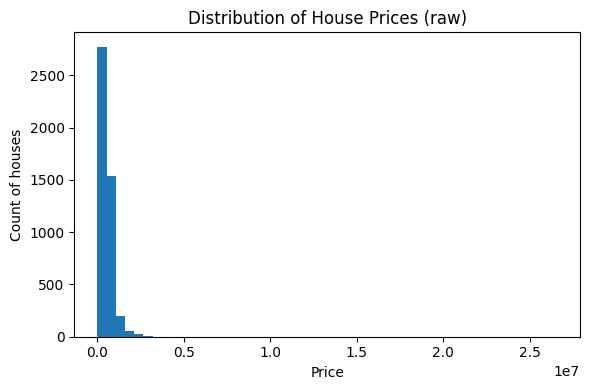

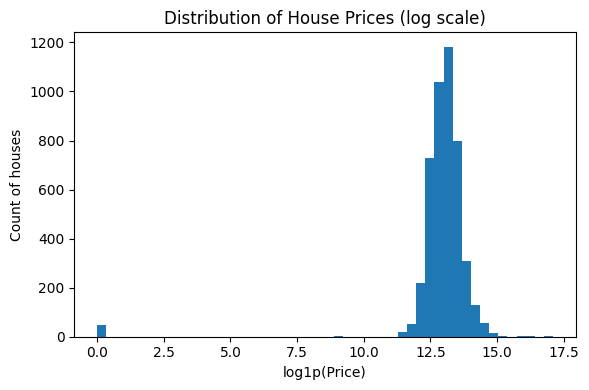


=== DATASET SUMMARY (overall scale of the problem) ===
 rows  columns  min_price  median_price  mean_price     max_price  std_price
 4600       18       0.00    460,943.46  551,962.99 26,590,000.00 563,834.70

=== TOP 3 NUMERIC FEATURES MOST POSITIVELY CORRELATED WITH PRICE ===
             correlation_with_price
sqft_living                    0.43
sqft_above                     0.37
bathrooms                      0.33

=== TOP 3 CITIES BY AVERAGE SALE PRICE ===
                avg_price
city                     
Medina       2,046,559.09
Clyde Hill   1,321,945.45
Yarrow Point 1,194,837.50

=== TOP 3 CONDITION RATINGS BY AVERAGE SALE PRICE ===
           avg_price
condition           
5         637,041.32
3         550,111.52
4         533,647.29

=== INTERPRETATION NOTES FOR REPORT ===
- Prices are highly right-skewed (a few very expensive houses).
- After log1p transform, the distribution is much closer to normal.
- The features most correlated with price (like sqft_living etc.) are

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# ---------- EDA STEP 1: Target distribution (price raw vs log) ----------

plt.figure(figsize=(6,4))
plt.hist(df_clean["price"], bins=50)
plt.xlabel("Price")
plt.ylabel("Count of houses")
plt.title("Distribution of House Prices (raw)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,4))
plt.hist(np.log1p(df_clean["price"]), bins=50)
plt.xlabel("log1p(Price)")
plt.ylabel("Count of houses")
plt.title("Distribution of House Prices (log scale)")
plt.tight_layout()
plt.show()

# ---------- EDA STEP 2: Dataset summary stats for report ----------

summary_points = {
    "rows": [df_clean.shape[0]],
    "columns": [df_clean.shape[1]],
    "min_price": [df_clean["price"].min()],
    "median_price": [df_clean["price"].median()],
    "mean_price": [df_clean["price"].mean()],
    "max_price": [df_clean["price"].max()],
    "std_price": [df_clean["price"].std()],
}
eda_summary_df = pd.DataFrame(summary_points)

print("\n=== DATASET SUMMARY (overall scale of the problem) ===")
print(eda_summary_df.to_string(index=False))


# ---------- EDA STEP 3: Top 3 strongest numeric correlations with price ----------

numeric_cols_all = df_clean.select_dtypes(include=[np.number]).columns.tolist()

corr_with_price = (
    df_clean[numeric_cols_all]
    .corr(numeric_only=True)["price"]
    .sort_values(ascending=False)
)

# drop 'price' itself from the list
corr_with_price_no_target = corr_with_price.drop(labels=["price"], errors="ignore")

top3_corr = corr_with_price_no_target.head(3)

print("\n=== TOP 3 NUMERIC FEATURES MOST POSITIVELY CORRELATED WITH PRICE ===")
print(top3_corr.to_frame(name="correlation_with_price").to_string())


# ---------- EDA STEP 4: Location effect (top 3 cities by avg price) ----------

avg_price_by_city = (
    df_clean.groupby("city")["price"]
    .mean()
    .sort_values(ascending=False)
    .head(3)
)

print("\n=== TOP 3 CITIES BY AVERAGE SALE PRICE ===")
print(avg_price_by_city.to_frame(name="avg_price").to_string())


# ---------- EDA STEP 5: Condition effect (top 3 conditions by avg price) ----------

avg_price_by_condition = (
    df_clean.groupby("condition")["price"]
    .mean()
    .sort_values(ascending=False)
    .head(3)
)

print("\n=== TOP 3 CONDITION RATINGS BY AVERAGE SALE PRICE ===")
print(avg_price_by_condition.to_frame(name="avg_price").to_string())


# ---------- EDA STEP 6: Short interpretation hints for your report ----------

print("\n=== INTERPRETATION NOTES FOR REPORT ===")
print("- Prices are highly right-skewed (a few very expensive houses).")
print("- After log1p transform, the distribution is much closer to normal.")
print("- The features most correlated with price (like sqft_living etc.) are strong predictors.")
print("- Some cities have a MUCH higher average sale price, showing location is critical.")
print("- Better 'condition' is also linked to higher sale price.")
print("- This justifies: keeping size/location/condition features, log-transforming price,")
print("  and using one-hot encoding for categorical location features in the model pipeline.")


In [34]:
summary_points = {
    "rows": [df_clean.shape[0]],
    "columns": [df_clean.shape[1]],
    "min_price": [df_clean["price"].min()],
    "median_price": [df_clean["price"].median()],
    "mean_price": [df_clean["price"].mean()],
    "max_price": [df_clean["price"].max()],
    "std_price": [df_clean["price"].std()],
}

eda_summary_df = pd.DataFrame(summary_points)
print("DATASET SUMMARY (for report):")
print(eda_summary_df)


DATASET SUMMARY (for report):
   rows  columns  min_price  median_price  mean_price     max_price  std_price
0  4600       18       0.00    460,943.46  551,962.99 26,590,000.00 563,834.70


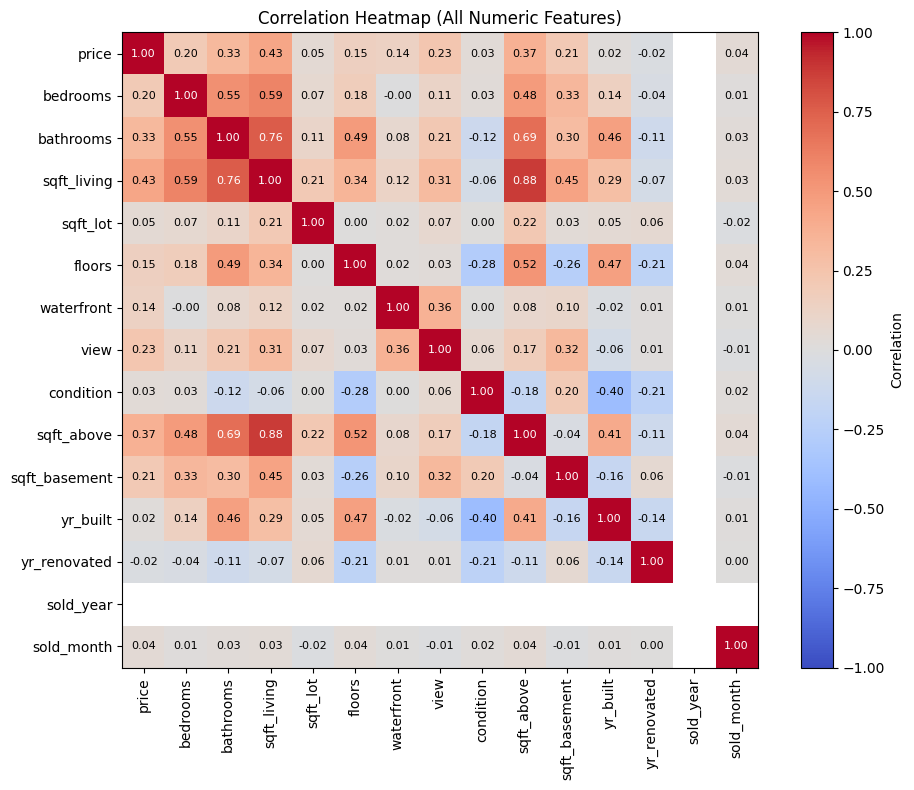

In [41]:
import numpy as np
import matplotlib.pyplot as plt

# Take only numeric columns
numeric_df = df_clean.select_dtypes(include=[np.number])

# Compute correlation matrix
corr_matrix = numeric_df.corr(numeric_only=True)

# Plot heatmap
fig, ax = plt.subplots(figsize=(10,8))
im = ax.imshow(corr_matrix, cmap="coolwarm", vmin=-1, vmax=1)

# Add colorbar
cbar = plt.colorbar(im, ax=ax)
cbar.set_label("Correlation")

# Axis ticks (feature names)
ax.set_xticks(np.arange(len(corr_matrix.columns)))
ax.set_yticks(np.arange(len(corr_matrix.index)))

ax.set_xticklabels(corr_matrix.columns, rotation=90)
ax.set_yticklabels(corr_matrix.index)

ax.set_title("Correlation Heatmap (All Numeric Features)")

# Loop through the data and put the correlation value in each cell
# We'll show e.g. 0.72 or -0.15
for i in range(len(corr_matrix.index)):
    for j in range(len(corr_matrix.columns)):
        value = corr_matrix.iloc[i, j]
        ax.text(
            j,                      # x position (column)
            i,                      # y position (row)
            f"{value:.2f}",         # text to display
            ha="center", va="center",
            color="black" if abs(value) < 0.6 else "white",  # white text on strong red/blue
            fontsize=8
        )

plt.tight_layout()
plt.show()
